Payment Prediction Date

Importing Required Libraries

In [1]:
import os
import pandas as pd
import sys
import scipy
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import io
from sklearn.metrics import accuracy_score



In [2]:
df1=pd.read_csv(r"F:/College/HighRadius/dataset_(1).csv")

In [3]:
df=df1.copy()

In [4]:
df.shape

(50000, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [6]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [7]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


In [8]:
df.describe

<bound method NDFrame.describe of       business_code cust_number       name_customer           clear_date  \
0              U001  0200769623        WAL-MAR corp  2020-02-11 00:00:00   
1              U001  0200980828              BEN E   2019-08-08 00:00:00   
2              U001  0200792734          MDV/ trust  2019-12-30 00:00:00   
3              CA02  0140105686            SYSC llc                  NaN   
4              U001  0200769623  WAL-MAR foundation  2019-11-25 00:00:00   
...             ...         ...                 ...                  ...   
49995          U001  0200561861      CO corporation                  NaN   
49996          U001  0200769623          WAL-MAR co  2019-09-03 00:00:00   
49997          U001  0200772595    SAFEW associates  2020-03-05 00:00:00   
49998          U001  0200726979           BJ'S  llc  2019-12-12 00:00:00   
49999          U001  0200020431            DEC corp  2019-01-15 00:00:00   

       buisness_year        doc_id posting_date  docu

## Data Cleaning

In [9]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


In [10]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [11]:
features_nan=[features for features in df.columns if df[features].isnull().sum()>0 ]
for features in features_nan:
  print('{}:{}% missing values'.format(features,np.round(df[features].isnull().mean(),4)))

clear_date:0.2% missing values
area_business:1.0% missing values
invoice_id:0.0001% missing values


In [12]:
df[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


In [13]:
df['baseline_create_date'].equals(df['document_create_date'])

False

In [14]:
df['baseline_create_date'].equals(df['document_create_date.1'])

False

In [15]:
df['document_create_date'].equals(df['document_create_date.1'])

False

In [16]:
#CHECK IF 'POSTING_ID' IS CONSTANT OR NOT 
df['posting_id'].nunique()
df['posting_id'].value_counts()

1.0    50000
Name: posting_id, dtype: int64

In [17]:
df['isOpen'].value_counts()

0    40000
1    10000
Name: isOpen, dtype: int64

In [18]:
df.nunique()

business_code                 6
cust_number                1425
name_customer              4197
clear_date                  403
buisness_year                 2
doc_id                    48839
posting_date                506
document_create_date        507
document_create_date.1      506
due_in_date                 547
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44349
baseline_create_date        506
cust_payment_terms           74
invoice_id                48833
isOpen                        2
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [20]:
#Drop Columns
df.drop(df.columns[[7,8,11,12,13,17,18]],axis=1,inplace=True)

In [21]:
df.shape

(50000, 12)

In [22]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

In [23]:
#Show duplicate_rows
duplicate_rows=df[df.duplicated()]
print('Duplicate Rows:')
duplicate_rows

Duplicate Rows:


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


In [24]:
#count of duplicate rows
duplicate_rows.count()

business_code           1161
cust_number             1161
name_customer           1161
clear_date               842
buisness_year           1161
doc_id                  1161
posting_date            1161
due_in_date             1161
invoice_currency        1161
total_open_amount       1161
baseline_create_date    1161
cust_payment_terms      1161
dtype: int64

In [25]:
#drop duplicate rows 
df=df.drop_duplicates()
df.shape

(48839, 12)

In [26]:
df.duplicated().any()

False

In [27]:
df.shape

(48839, 12)

In [28]:
#count of null values
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

## Data type conversion

In [29]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

In [30]:
print(df['clear_date'].dtypes)
print(df['posting_date'].dtypes)
print(df['due_in_date'].dtypes)
print(df['baseline_create_date'].dtypes)

object
object
float64
float64


In [31]:
df['clear_date']=pd.to_datetime(df['clear_date'])
df['posting_date']=pd.to_datetime(df['posting_date'])
df['due_in_date']=pd.to_datetime(df['due_in_date'])
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'])

C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [32]:
df.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

In [33]:
df['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

In [34]:
#Convert all CAD into USD currency of "total_open_amount" column
rates={'CAD':0.7}
df['converted_usd']=df['invoice_currency'].map(rates).fillna(1)*df['total_open_amount']

C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
df['converted_usd']

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64

In [36]:
df['buisness_year'].value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         48839 non-null  object        
 1   cust_number           48839 non-null  object        
 2   name_customer         48839 non-null  object        
 3   clear_date            39158 non-null  datetime64[ns]
 4   buisness_year         48839 non-null  float64       
 5   doc_id                48839 non-null  float64       
 6   posting_date          48839 non-null  datetime64[ns]
 7   due_in_date           48839 non-null  datetime64[ns]
 8   invoice_currency      48839 non-null  object        
 9   total_open_amount     48839 non-null  float64       
 10  baseline_create_date  48839 non-null  datetime64[ns]
 11  cust_payment_terms    48839 non-null  object        
 12  converted_usd         48839 non-null  float64       
dtypes: datetime64[ns

In [38]:
df.drop(df.columns[[8,9]],axis=1,inplace=True)

C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         48839 non-null  object        
 1   cust_number           48839 non-null  object        
 2   name_customer         48839 non-null  object        
 3   clear_date            39158 non-null  datetime64[ns]
 4   buisness_year         48839 non-null  float64       
 5   doc_id                48839 non-null  float64       
 6   posting_date          48839 non-null  datetime64[ns]
 7   due_in_date           48839 non-null  datetime64[ns]
 8   baseline_create_date  48839 non-null  datetime64[ns]
 9   cust_payment_terms    48839 non-null  object        
 10  converted_usd         48839 non-null  float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 4.5+ MB


In [40]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')

## Splitting Data

In [41]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

In [42]:
df['clear_date'].isnull().sum()

9681

In [43]:
df3=df.copy()

In [44]:
df3=df3.dropna()

In [45]:
df3.isnull().sum()

business_code           0
cust_number             0
name_customer           0
clear_date              0
buisness_year           0
doc_id                  0
posting_date            0
due_in_date             0
baseline_create_date    0
cust_payment_terms      0
converted_usd           0
dtype: int64

In [46]:
maindata=df3.copy()

In [47]:
df4=df.copy()

In [48]:
df5=df4[df4['clear_date'].isnull()]
print(df5)

      business_code cust_number        name_customer clear_date  \
3              CA02  0140105686             SYSC llc        NaT   
7              U001  0200744019              TARG us        NaT   
10             U001  0200418007                  AM         NaT   
14             U001  0200739534           OK systems        NaT   
15             U001  0200353024     DECA corporation        NaT   
...             ...         ...                  ...        ...   
49975          U001  0200769623           WAL-MAR in        NaT   
49980          U001  0200769623  WAL-MAR corporation        NaT   
49982          U001  0200148860             DOLLA co        NaT   
49992          U001  0200900909             SYSCO co        NaT   
49995          U001  0200561861       CO corporation        NaT   

       buisness_year        doc_id posting_date                   due_in_date  \
3             2020.0  2.960623e+09   2020-03-30 1970-01-01 00:00:00.020200410   
7             2020.0  1.930659e+0

In [49]:
df5.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

In [50]:
nulldata=df5.copy()

In [51]:
print(maindata.shape)

(39158, 11)


In [52]:
nulldata.shape

(9681, 11)

In [53]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,1970-01-01 00:00:00.020200210,1970-01-01 00:00:00.020200126,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,1970-01-01 00:00:00.020190811,1970-01-01 00:00:00.020190722,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,1970-01-01 00:00:00.020190929,1970-01-01 00:00:00.020190914,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,1970-01-01 00:00:00.020191128,1970-01-01 00:00:00.020191113,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,1970-01-01 00:00:00.020191004,1970-01-01 00:00:00.020190924,CA10,15558.088


In [54]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,1970-01-01 00:00:00.020200410,1970-01-01 00:00:00.020200331,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,1970-01-01 00:00:00.020200403,1970-01-01 00:00:00.020200319,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,1970-01-01 00:00:00.020200326,1970-01-01 00:00:00.020200311,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,1970-01-01 00:00:00.020200430,1970-01-01 00:00:00.020200415,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,1970-01-01 00:00:00.020200426,1970-01-01 00:00:00.020200416,NAM2,3726.06


In [55]:
maindata['Delay']=maindata['clear_date']-maindata['due_in_date']

In [56]:
maindata.head(2)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,1970-01-01 00:00:00.020200210,1970-01-01 00:00:00.020200126,NAH4,54273.28,18302 days 23:59:59.979799
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,1970-01-01 00:00:00.020190811,1970-01-01 00:00:00.020190722,NAD1,79656.60,18115 days 23:59:59.979809


In [57]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39158 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   business_code         39158 non-null  object         
 1   cust_number           39158 non-null  object         
 2   name_customer         39158 non-null  object         
 3   clear_date            39158 non-null  datetime64[ns] 
 4   buisness_year         39158 non-null  float64        
 5   doc_id                39158 non-null  float64        
 6   posting_date          39158 non-null  datetime64[ns] 
 7   due_in_date           39158 non-null  datetime64[ns] 
 8   baseline_create_date  39158 non-null  datetime64[ns] 
 9   cust_payment_terms    39158 non-null  object         
 10  converted_usd         39158 non-null  float64        
 11  Delay                 39158 non-null  timedelta64[ns]
dtypes: datetime64[ns](4), float64(3), object(4), timedelta64[ns]

In [58]:
#maindata['avg_delay']=maindata.groupby('name_customer').Delay.transform('mean')
avg_delay=maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)

In [59]:
map_cust_num=maindata.groupby("name_customer")['Delay'].mean(numeric_only=False)

In [60]:
map_cust_num

name_customer
11078 us               18017 days 23:59:59.979809
17135 associates       18190 days 23:59:59.979809
17135 llc              18311 days 23:59:59.979799
236008 associates      18224 days 23:59:59.979808
99 CE                  18305 days 11:59:59.979799
                                  ...            
YEN BROS corp          18333 days 23:59:59.979799
YEN BROS corporation   18151 days 23:59:59.979809
YEN BROS llc           18164 days 23:59:59.979809
ZARCO co               18037 days 23:59:59.979809
ZIYAD  us              18112 days 23:59:59.979809
Name: Delay, Length: 3889, dtype: timedelta64[ns]

In [61]:
maindata['avg_delay']=maindata['name_customer'].map(map_cust_num)

In [62]:
maindata['avg_delay'].value_counts()

18113 days 00:53:09.556340    921
18115 days 01:45:10.092154    890
18116 days 03:13:37.606916    885
18109 days 09:09:21.829506    865
18112 days 08:58:57.407374    863
                             ... 
18102 days 23:59:59.979809      1
18099 days 23:59:59.979809      1
18004 days 23:59:59.979809      1
18206 days 23:59:59.979809      1
18219 days 23:59:59.979809      1
Name: avg_delay, Length: 2218, dtype: int64

In [63]:
maindata['avg_delay'] = pd.to_timedelta(maindata['avg_delay']).dt.total_seconds() 

In [64]:
maindata.head(2)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,1970-01-01 00:00:00.020200210,1970-01-01 00:00:00.020200126,NAH4,54273.28,18302 days 23:59:59.979799,1.564909e+09
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,1970-01-01 00:00:00.020190811,1970-01-01 00:00:00.020190722,NAD1,79656.60,18115 days 23:59:59.979809,1.569542e+09


In [65]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39158 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   business_code         39158 non-null  object         
 1   cust_number           39158 non-null  object         
 2   name_customer         39158 non-null  object         
 3   clear_date            39158 non-null  datetime64[ns] 
 4   buisness_year         39158 non-null  float64        
 5   doc_id                39158 non-null  float64        
 6   posting_date          39158 non-null  datetime64[ns] 
 7   due_in_date           39158 non-null  datetime64[ns] 
 8   baseline_create_date  39158 non-null  datetime64[ns] 
 9   cust_payment_terms    39158 non-null  object         
 10  converted_usd         39158 non-null  float64        
 11  Delay                 39158 non-null  timedelta64[ns]
 12  avg_delay             39158 non-null  float64        
dtypes

In [66]:
maindata.drop(maindata.columns[[3,11]],axis=1,inplace=True)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X=maindata.drop(['avg_delay'],axis=1)
y=maindata['avg_delay']

In [69]:
X_train,X_loc_test,y_train,y_loc_test=train_test_split(X,y,train_size=0.60)

In [70]:
print(X_train.shape)
print(X_loc_test.shape)

(23494, 10)
(15664, 10)


In [71]:
print(y_train.shape)
print(y_loc_test.shape)

(23494,)
(15664,)


In [72]:
X_val, X_test, y_val, y_test=train_test_split(X_loc_test,y_loc_test,train_size=0.50)

In [73]:
print(X_val.shape)
print(X_test.shape)

(7832, 10)
(7832, 10)


In [74]:
print(y_val.shape)
print(y_test.shape)

(7832,)
(7832,)


## EDA

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

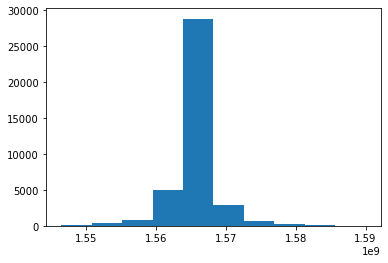

In [76]:
plt.hist(y)
plt.show()

In [77]:
x_train=X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

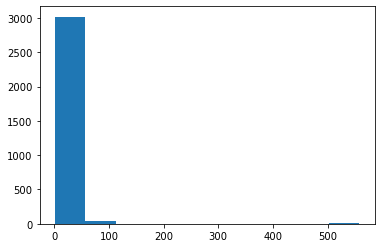

In [78]:
plt.hist(x_train['doc_id'])
plt.show()

In [79]:
X_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'posting_date', 'due_in_date', 'baseline_create_date',
       'cust_payment_terms', 'converted_usd'],
      dtype='object')

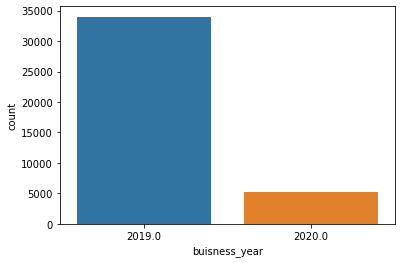

In [80]:
sns.countplot(X['buisness_year'])

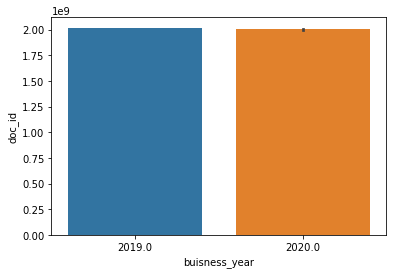

In [81]:
ax = sns.barplot(x="buisness_year", y="doc_id", data=X)

## Feature Engineering

In [82]:
X_train.head(3)

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
25161,U001,0200769623,WAL-MAR trust,2019.0,1.929102e+09,2019-04-10,1970-01-01 00:00:00.020190425,1970-01-01 00:00:00.020190410,NAH4,15743.670
43194,CA02,0140104429,COSTCO,2019.0,2.960545e+09,2019-04-27,1970-01-01 00:00:00.020190508,1970-01-01 00:00:00.020190428,CA10,6757.667
47741,U001,0200705742,DOT systems,2019.0,1.929368e+09,2019-05-23,1970-01-01 00:00:00.020190626,1970-01-01 00:00:00.020190523,NAAW,28534.360


In [83]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit_transform(X_train['business_code'])

array([1, 0, 1, ..., 1, 1, 1])

In [84]:
X_train['business_code'].value_counts()

U001    21300
CA02     1844
U013      285
U002       59
U007        3
U005        3
Name: business_code, dtype: int64

In [85]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
X_val['business_code_enc'] = business_coder.fit_transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.fit_transform(X_test['business_code'])

C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
25161,U001,1
43194,CA02,0
47741,U001,1
3929,U001,1
11710,U001,1
...,...,...
32210,U001,1
26490,U001,1
20714,U001,1
41292,U001,1


In [88]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [89]:
X_train.drop(X_train.columns[[0]],axis=1,inplace=True)

C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [90]:
X_val.drop(X_val.columns[[0]],axis=1,inplace=True)
X_test.drop(X_test.columns[[0]],axis=1,inplace=True)

In [91]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [92]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

In [93]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [94]:
X_train ,X_val, X_test = custom(['name_customer'])

In [95]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [96]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

In [97]:
X_train.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [98]:
X_val.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [99]:
X_test.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [100]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year

C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [101]:
X_train ,X_val, X_test = custom(['posting_date'])

In [102]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day

C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [103]:
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month

X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [104]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

In [105]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_test['day_of_due'] = X_test['due_in_date'].dt.day

X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_test['month_of_due'] = X_test['due_in_date'].dt.month

X_train['year_of_due'] = X_train['due_in_date'].dt.year
X_val['year_of_due'] = X_val['due_in_date'].dt.year
X_test['year_of_due'] = X_test['due_in_date'].dt.year

C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sharma\anaconda3\envs\p36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [106]:
X_train ,X_val, X_test = custom(['due_in_date'])

In [107]:
X_train.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [108]:
X_test.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [109]:
X_val.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

## Feature Selection

In [110]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

10

In [111]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

6


In [112]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

4


In [113]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [114]:
train=X_train.copy()
handling_correlation(train.copy(),threshold=0.85)

['year_of_postingdate']

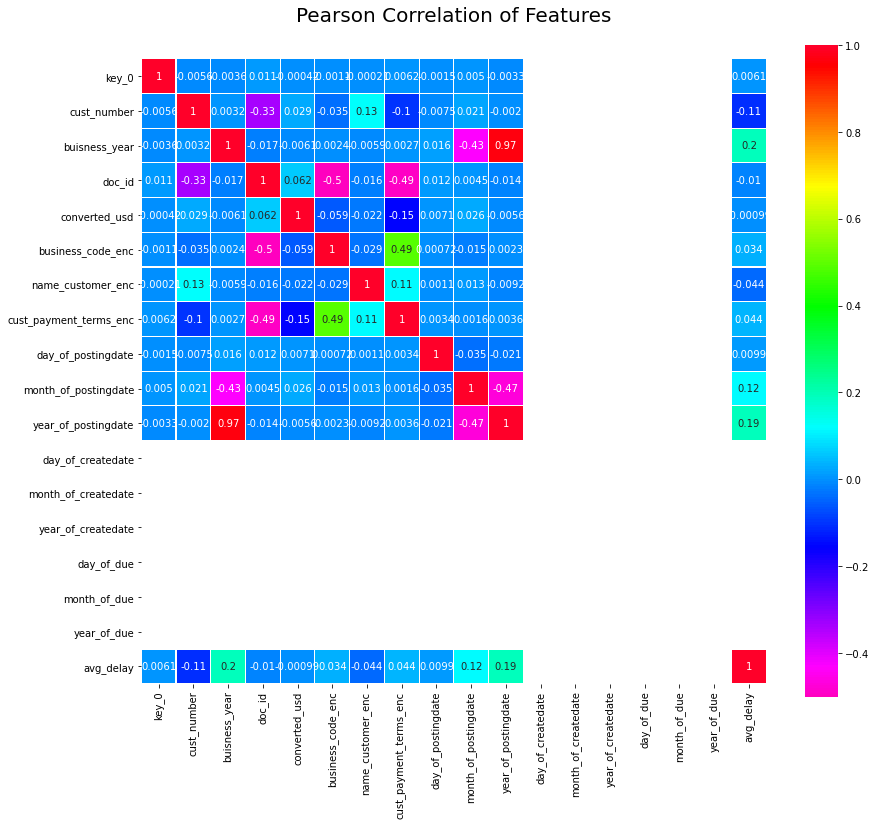

In [115]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

In [116]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [117]:
sel.variances_

array([1.79547977e+15, 1.13344940e-01, 8.38301155e+16, 1.33100258e+09,
       2.76032448e-01, 1.04888421e+06, 1.19803728e+02, 7.56860164e+01,
       1.21840329e+01, 1.13368695e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [118]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23494 entries, 25161 to 28406
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             23494 non-null  int32  
 1   buisness_year           23494 non-null  float64
 2   doc_id                  23494 non-null  float64
 3   converted_usd           23494 non-null  float64
 4   business_code_enc       23494 non-null  int32  
 5   name_customer_enc       23494 non-null  int64  
 6   cust_payment_terms_enc  23494 non-null  int64  
 7   day_of_postingdate      23494 non-null  int64  
 8   month_of_postingdate    23494 non-null  int64  
 9   year_of_postingdate     23494 non-null  int64  
 10  day_of_createdate       23494 non-null  int64  
 11  month_of_createdate     23494 non-null  int64  
 12  year_of_createdate      23494 non-null  int64  
 13  day_of_due              23494 non-null  int64  
 14  month_of_due            23494 non-

In [119]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23494 entries, 25161 to 28406
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             23494 non-null  int32  
 1   buisness_year           23494 non-null  float64
 2   doc_id                  23494 non-null  float64
 3   converted_usd           23494 non-null  float64
 4   business_code_enc       23494 non-null  int32  
 5   name_customer_enc       23494 non-null  int64  
 6   cust_payment_terms_enc  23494 non-null  int64  
 7   day_of_postingdate      23494 non-null  int64  
 8   month_of_postingdate    23494 non-null  int64  
 9   year_of_postingdate     23494 non-null  int64  
 10  day_of_createdate       23494 non-null  int64  
 11  month_of_createdate     23494 non-null  int64  
 12  year_of_createdate      23494 non-null  int64  
 13  day_of_due              23494 non-null  int64  
 14  month_of_due            23494 non-

In [120]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Linear Reg

In [121]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [122]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [123]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

3159439.2854552185

In [124]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[10259693258798.037],[0.10954580267363256],

### Decision Tree reg

In [125]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
regressor1 = DecisionTreeRegressor()
regressor1.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [126]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [127]:
predict_test= regressor1.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

3426593.3342525763

In [128]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'DecisionTreeRegressor'],[10259693258798.037, 10259693258798.037],[0.10954580267363256, 0.10954580267363256],

# Random Forest Reg

In [129]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [130]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [131]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2540289.9471608936

In [132]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor'],[10259693258798.037, 10259693258798.037, 6792900032866.842],[0.10954580267363256, 0.10954580267363256, 0.4104339970303035],

# Support vector reg

In [133]:
from sklearn.svm import SVR
Algorithm.append('SVR')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [134]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [135]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

3365556.2292093216

In [136]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'SVR'],[10259693258798.037, 10259693258798.037, 6792900032866.842, 11554257464158.629],[0.10954580267363256, 0.10954580267363256, 0.4104339970303035, -0.0028113703230641107],

# XGBOOST

In [137]:
!pip install xgboost
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [138]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [139]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2603289.479353953

In [140]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'SVR', 'XGB Regressor'],[10259693258798.037, 10259693258798.037, 6792900032866.842, 11554257464158.629, 7210441627622.253],[0.10954580267363256, 0.10954580267363256, 0.4104339970303035, -0.0028113703230641107, 0.3741949344940557],

# BEST FIT MODEL

In [141]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

In [142]:
mean_squared_error(y_test,predictedfinal,squared=False)

2685226.550520878

In [143]:
predict_test= regressorfinal.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2603289.479353953

In [144]:
r2_score(y_val, predict_test)

0.3991073895926798

In [145]:
r2_score(y_test,predictedfinal)

0.3741949344940557

XGBOOST IS THE BEST FIT MODEL AS MEAN SQUARE ERROR IS LESS AMONGST ALL THE OTHER MODELS 

## nulldata

In [146]:
nulldata.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,1970-01-01 00:00:00.020200410,1970-01-01 00:00:00.020200331,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,1970-01-01 00:00:00.020200403,1970-01-01 00:00:00.020200319,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,1970-01-01 00:00:00.020200326,1970-01-01 00:00:00.020200311,NAA8,3525.59


In [147]:
nulldata.shape

(9681, 11)

In [148]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-null   float64       
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   baseline_create_date  9681 non-null   datetime64[ns]
 9   cust_payment_terms    9681 non-null   object        
 10  converted_usd         9681 non-null   float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 907.6+ KB


In [149]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,32065.681125
std,0.0,2.673629e+08,35419.613688
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5607.190000
50%,2020.0,1.930731e+09,19024.190000
75%,2020.0,1.930818e+09,47752.640000
max,2020.0,2.960636e+09,653644.800000


In [150]:
nulldata1=nulldata.copy()

In [151]:
nulldata.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')

In [152]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

In [153]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

In [154]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year



In [155]:
nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

In [156]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


In [157]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           9681 non-null   object        
 1   cust_number             9681 non-null   int32         
 2   name_customer           9681 non-null   object        
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           9681 non-null   float64       
 5   doc_id                  9681 non-null   float64       
 6   posting_date            9681 non-null   datetime64[ns]
 7   due_in_date             9681 non-null   datetime64[ns]
 8   baseline_create_date    9681 non-null   datetime64[ns]
 9   cust_payment_terms      9681 non-null   object        
 10  converted_usd           9681 non-null   float64       
 11  business_code_enc       9681 non-null   int64         
 12  day_of_cleardate        0 non-null      float64

In [158]:
nulldata.shape

(9681, 26)

In [159]:
nulldata.drop(['business_code', 'baseline_create_date','due_in_date','posting_date','name_customer','clear_date','cust_payment_terms','day_of_cleardate','month_of_cleardate','year_of_cleardate'], axis = 1)

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,cust_payment_terms_enc,name_customer_enc
3,140105686,2020.0,2.960623e+09,2309.79,63,30,3,2020,1,1,1970,1,1,1970,5,2696
7,200744019,2020.0,1.930659e+09,11173.02,63,19,3,2020,1,1,1970,1,1,1970,19,2777
10,200418007,2020.0,1.930611e+09,3525.59,63,11,3,2020,1,1,1970,1,1,1970,19,91
14,200739534,2020.0,1.930788e+09,121105.65,63,15,4,2020,1,1,1970,1,1,1970,19,2015
15,200353024,2020.0,1.930817e+09,3726.06,63,23,4,2020,1,1,1970,1,1,1970,34,719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020.0,1.930625e+09,13114.99,63,10,3,2020,1,1,1970,1,1,1970,32,2968
49980,200769623,2020.0,1.930851e+09,8899.71,63,3,5,2020,1,1,1970,1,1,1970,32,2966
49982,200148860,2020.0,1.930638e+09,4967.06,63,11,3,2020,1,1,1970,1,1,1970,19,798
49992,200900909,2020.0,1.930702e+09,1998.64,63,25,3,2020,1,1,1970,1,1,1970,19,2742


In [160]:
nulldata.shape

(9681, 26)

In [161]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [162]:
nulldata.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd',
       'business_code_enc', 'day_of_cleardate', 'month_of_cleardate',
       'year_of_cleardate', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [163]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

In [164]:
nulldata2.head(3)

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2309.79,63,2696,5,30,3,2020,1,1,1970,1,1,1970
7,200744019,2020.0,1.930659e+09,11173.02,63,2777,19,19,3,2020,1,1,1970,1,1,1970
10,200418007,2020.0,1.930611e+09,3525.59,63,91,19,11,3,2020,1,1,1970,1,1,1970


In [165]:
df5.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')

In [166]:
final_result= regressorfinal.predict(nulldata2)

In [167]:
final_result

array([1.5671050e+09, 1.5675885e+09, 1.5694593e+09, ..., 1.5686026e+09,
       1.5645893e+09, 1.5699492e+09], dtype=float32)

In [168]:
final_result = pd.Series(final_result,name='avg_delay')

In [169]:
final_result.head(3)

0    1.567105e+09
1    1.567588e+09
2    1.569459e+09
Name: avg_delay, dtype: float32

In [170]:
df5.reset_index(drop=True,inplace=True)
Final = df5.merge(final_result , on = nulldata.index )

In [171]:
Final.head(4)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,1970-01-01 00:00:00.020200410,1970-01-01 00:00:00.020200331,CA10,2309.79,1.567105e+09
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,1970-01-01 00:00:00.020200403,1970-01-01 00:00:00.020200319,NAA8,11173.02,1.567588e+09
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,1970-01-01 00:00:00.020200326,1970-01-01 00:00:00.020200311,NAA8,3525.59,1.569459e+09
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,1970-01-01 00:00:00.020200430,1970-01-01 00:00:00.020200415,NAA8,121105.65,1.567641e+09


In [172]:
Final.shape

(9681, 13)

In [173]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

In [174]:
Final['clear_date']

0      2019-08-29 18:57:04.020200410
1      2019-09-04 09:14:40.020200403
2      2019-09-26 00:55:28.020200326
3      2019-09-04 23:53:36.020200430
4      2019-09-04 06:09:04.020200426
                    ...             
9676   2019-08-20 22:11:12.020200325
9677   2019-08-13 19:52:32.020200518
9678   2019-09-16 02:57:04.020200326
9679   2019-07-31 16:08:32.020200409
9680   2019-10-01 16:59:44.020200506
Name: clear_date, Length: 9681, dtype: datetime64[ns]

In [175]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

In [176]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,2019-08-29 18:57:04.020200410,2020.0,2.960623e+09,2020-03-30,1970-01-01 00:00:00.020200410,1970-01-01 00:00:00.020200331,CA10,2309.79,18137.0
1,7,U001,0200744019,TARG us,2019-09-04 09:14:40.020200403,2020.0,1.930659e+09,2020-03-19,1970-01-01 00:00:00.020200403,1970-01-01 00:00:00.020200319,NAA8,11173.02,18143.0
2,10,U001,0200418007,AM,2019-09-26 00:55:28.020200326,2020.0,1.930611e+09,2020-03-11,1970-01-01 00:00:00.020200326,1970-01-01 00:00:00.020200311,NAA8,3525.59,18165.0
3,14,U001,0200739534,OK systems,2019-09-04 23:53:36.020200430,2020.0,1.930788e+09,2020-04-15,1970-01-01 00:00:00.020200430,1970-01-01 00:00:00.020200415,NAA8,121105.65,18143.0
4,15,U001,0200353024,DECA corporation,2019-09-04 06:09:04.020200426,2020.0,1.930817e+09,2020-04-23,1970-01-01 00:00:00.020200426,1970-01-01 00:00:00.020200416,NAM2,3726.06,18143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,U001,0200769623,WAL-MAR in,2019-08-20 22:11:12.020200325,2020.0,1.930625e+09,2020-03-10,1970-01-01 00:00:00.020200325,1970-01-01 00:00:00.020200310,NAH4,13114.99,18128.0
9677,49980,U001,0200769623,WAL-MAR corporation,2019-08-13 19:52:32.020200518,2020.0,1.930851e+09,2020-05-03,1970-01-01 00:00:00.020200518,1970-01-01 00:00:00.020200503,NAH4,8899.71,18121.0
9678,49982,U001,0200148860,DOLLA co,2019-09-16 02:57:04.020200326,2020.0,1.930638e+09,2020-03-11,1970-01-01 00:00:00.020200326,1970-01-01 00:00:00.020200311,NAA8,4967.06,18155.0
9679,49992,U001,0200900909,SYSCO co,2019-07-31 16:08:32.020200409,2020.0,1.930702e+09,2020-03-25,1970-01-01 00:00:00.020200409,1970-01-01 00:00:00.020200325,NAA8,1998.64,18108.0


In [177]:
Final_1=Final.copy()

In [178]:
Final_1['avg_delay_1']=Final_1['avg_delay']/365

In [179]:
bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

In [180]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 0 to 9680
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key_0                 9681 non-null   int64         
 1   business_code         9681 non-null   object        
 2   cust_number           9681 non-null   object        
 3   name_customer         9681 non-null   object        
 4   clear_date            9681 non-null   datetime64[ns]
 5   buisness_year         9681 non-null   float64       
 6   doc_id                9681 non-null   float64       
 7   posting_date          9681 non-null   datetime64[ns]
 8   due_in_date           9681 non-null   datetime64[ns]
 9   baseline_create_date  9681 non-null   datetime64[ns]
 10  cust_payment_terms    9681 non-null   object        
 11  converted_usd         9681 non-null   float64       
 12  avg_delay             9681 non-null   float64       
 13  Aging Bucket      

In [181]:
Final.to_csv('F:/HRC71848W_YUGVANSH.csv',index=False)

In [ ]:
#round(regressorfinal.score(X_train, y_train),2)
#0.96

### **END**